In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_chicago = pd.read_csv('./weather_chicago.csv')

In [3]:
df_chicago.head()

,year,city,country,avg_temp
0,1743,Chicago,United States,5.44
1,1744,Chicago,United States,11.73
2,1745,Chicago,United States,1.80
3,1746,Chicago,United States,NaN
4,1747,Chicago,United States,NaN


In [4]:
df_chicago.drop(['city','country'], axis=1, inplace=True)

In [5]:
df_chicago.head()

,year,avg_temp
0,1743,5.44
1,1744,11.73
2,1745,1.80
3,1746,NaN
4,1747,NaN


In [6]:
df_chicago.dropna(inplace=True)

In [7]:
df_chicago.head()

,year,avg_temp
0,1743,5.44
1,1744,11.73
2,1745,1.80
7,1750,10.49
8,1751,11.19


In [8]:
df_chicago.avg_temp = df_chicago.avg_temp.apply(lambda temp: round(temp * (9/5) + 32, 2))

In [9]:
df_chicago.head()

,year,avg_temp
0,1743,41.79
1,1744,53.11
2,1745,35.24
7,1750,50.88
8,1751,52.14


In [10]:
df_chicago.to_csv('weather_chicago_v2.csv', index=False)

df_chic = pd.read_csv('./weather_chicago_v2.csv')
df_chic.head()

,year,avg_temp
0,1743,41.79
1,1744,53.11
2,1745,35.24
3,1750,50.88
4,1751,52.14


In [11]:
df_chic['ra_50'] = df_chic.avg_temp.rolling(50).mean()
df_chic.head()

,year,avg_temp,ra_50
0,1743,41.79,NaN
1,1744,53.11,NaN
2,1745,35.24,NaN
3,1750,50.88,NaN
4,1751,52.14,NaN


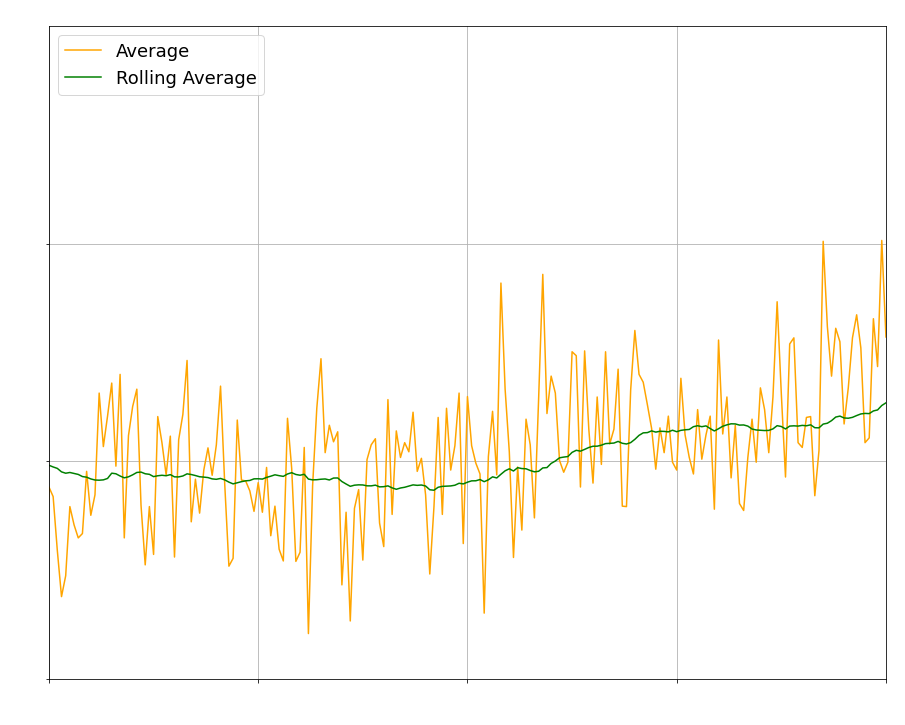

In [17]:
year_range = range(1813, 2014, 50)
year_labels = ['1813', '1863', '1913', '1963', '2013']
temp_range = range(45, 60, 5)

plt.subplots(figsize=(15, 12))

plt.grid(True)
plt.title('Chicago Temperatures (1813-2013)', fontsize=18, color="white")
plt.plot(df_chic.year, df_chic.avg_temp, color='orange')
plt.plot(df_chic.year, df_chic.ra_50, color='green')
plt.xlim(int(year_labels[0]), int(year_labels[-1]))
plt.ylim(45, 60)
plt.xticks(year_range, year_labels, color="white")
plt.yticks(temp_range, color='white')
plt.xlabel('Year', fontsize = 18, color="white")
plt.ylabel('Temperature (Fahrenheit)', fontsize=18, color="white")
plt.legend(['Average', 'Rolling Average'], prop={'size': 18}, loc=2);